In [1]:
#I'm not completely sure what I'm supposed to do in this exercise so I'll just do whatever I seem to find interesting.
import pandas as pd

def load_data(data):
    return pd.read_csv(data, encoding='unicode_escape')

In [2]:
bands = load_data('metal_bands_2017.csv')
world_population = load_data('world_population_1960_2015.csv')

In [3]:
bands.head() #get a feel of the data

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death


In [4]:
bands.info() #couple of null values in origin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5000 non-null   int64 
 1   band_name   5000 non-null   object
 2   fans        5000 non-null   int64 
 3   formed      5000 non-null   object
 4   origin      4992 non-null   object
 5   split       5000 non-null   object
 6   style       5000 non-null   object
dtypes: int64(2), object(5)
memory usage: 175.8+ KB


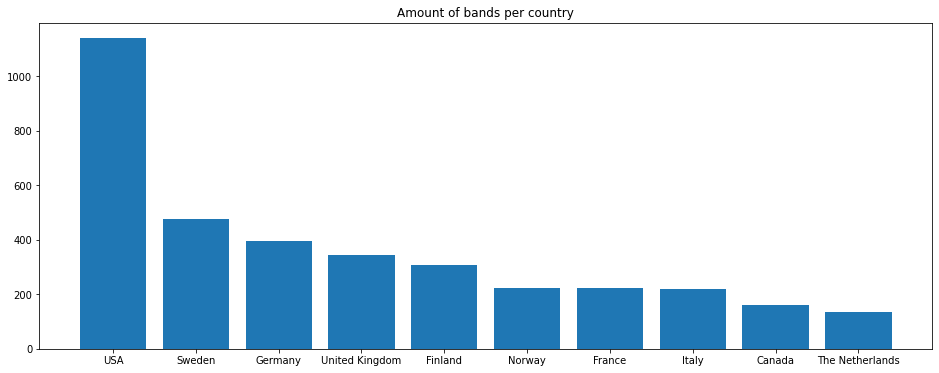

In [5]:
#Let's see which country has the most metal bands
import matplotlib.pyplot as plt

band_countries = bands['origin'].value_counts()
plt.figure(figsize=(16,6))
plt.title('Amount of bands per country')
plt.bar(band_countries[:10].keys(), band_countries[:10].values)
plt.show()

<BarContainer object of 10 artists>

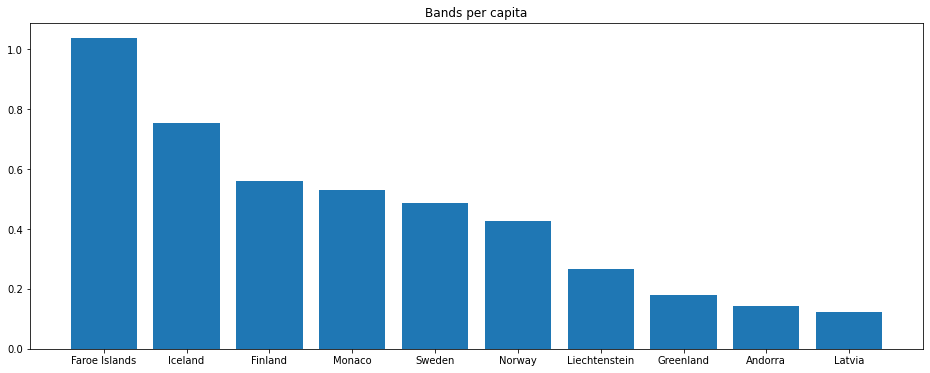

In [6]:
#Let's see how it looks per capita now
band_count = [0 for i in range(len(world_population))]
for index, country in world_population.iterrows():
    if country['Country Name'] in band_countries:
        band_count[index] = band_countries[country['Country Name']]

#per capita = amount of bands / population * arbitrary scalar
world_population['bands_per_capita'] = (pd.Series(band_count) / world_population['2015']) * 10000
world_population = world_population.sort_values(by='bands_per_capita', ascending=False)
plt.figure(figsize=(16,6))
plt.title('Bands per capita')
plt.bar(world_population[:10]['Country Name'], world_population[:10]['bands_per_capita'])

In [7]:
#Let's take a look at Finland specifically
finnish_bands = bands[bands['origin'] == 'Finland']
finnish_bands.head()

,Unnamed: 0,band_name,fans,formed,origin,split,style
9,9,Nightwish,2183,1996,Finland,1996,"Symphonic power,Gothic,Symphonic"
10,10,Children Of Bodom,2153,1993,Finland,-,Extreme power
17,17,Ensiferum,1879,1995,Finland,1995,Extreme folk
23,23,Wintersun,1640,2004,Finland,2004,Extreme power
24,24,Insomnium,1547,1997,Finland,-,Melodic death


<BarContainer object of 15 artists>

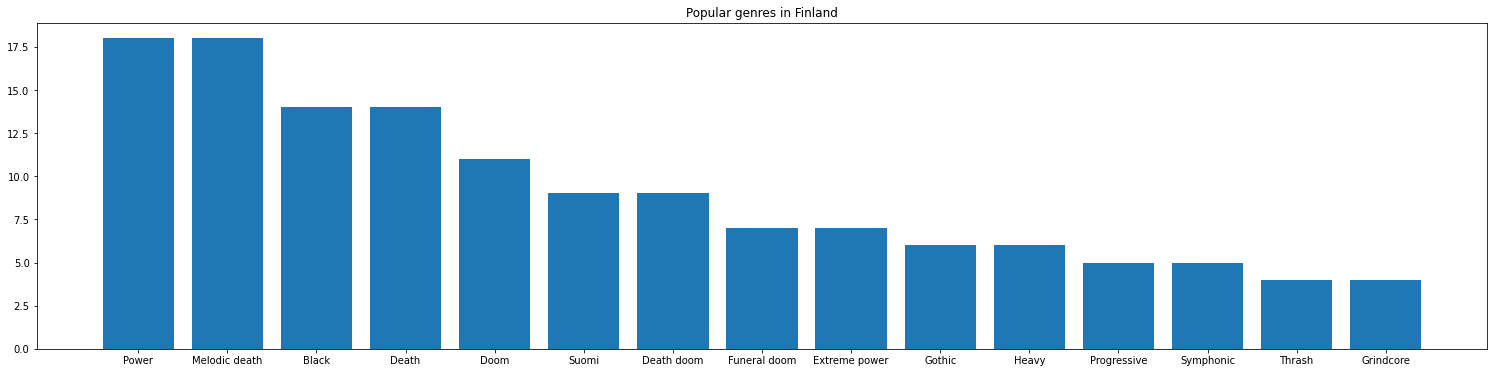

In [8]:
#Let's see which genres have the most bands in Finland
genres = finnish_bands['style'].value_counts()
plt.figure(figsize=(26,6))
plt.title('Popular genres in Finland')
plt.bar(genres[:15].keys(), genres[:15].values)